In [1]:
import networkx as nx
from shapely.geometry import MultiPoint, Point

In [2]:
%env NX_CUGRAPH_AUTOCONFIG=True

env: NX_CUGRAPH_AUTOCONFIG=True


In [3]:
import osmnx as ox

# Load the graph from OpenStreetMap
place = "Saugus, Massachusetts, USA"
G = ox.graph_from_place(place, network_type="drive")

# Convert to GeoDataFrames
nodes, edges = ox.graph_to_gdfs(G)

In [4]:
nodes

,y,x,street_count,highway,geometry
osmid,,,,,
73588159,42.443740,-71.013242,3,NaN,POINT (-71.01324 42.44374)
74910413,42.469531,-71.005453,4,NaN,POINT (-71.00545 42.46953)
74910478,42.457895,-71.024020,3,NaN,POINT (-71.02402 42.4579)
74910597,42.495357,-71.020027,3,NaN,POINT (-71.02003 42.49536)
74910645,42.480815,-71.011205,1,turning_circle,POINT (-71.01121 42.48081)
...,...,...,...,...,...
12294422413,42.456569,-70.984818,1,NaN,POINT (-70.98482 42.45657)
12499330206,42.454323,-71.023641,3,NaN,POINT (-71.02364 42.45432)
12502909705,42.464534,-71.025069,3,NaN,POINT (-71.02507 42.46453)


In [5]:
edges

osmid      highway lanes  \
u           v           key                                 
73588159    74923778    0      9616163    secondary     2   
74910413    74937219    0      9617219  residential     2   
            6275285121  0      9616798  residential     2   
            74963488    0      9616798  residential     2   
            74944984    0      9617219  residential     2   
...                                ...          ...   ...   
12502909705 74911107    0      9617135   trunk_link     1   
            74921675    0    845938777        trunk     3   
12502909707 12502909709 0    591934084        trunk     3   
12502909709 74959030    0    591934084        trunk     3   
            74924224    0      9616328   trunk_link     1   

                                             name width  oneway reversed  \
u           v           key                                                
73588159    74923778    0          Lincoln Avenue  15.2   False    False   
74910413    74937219    0           Bridge Street  11.0   False    False   
            6275285121  0          Saville Street  11.6   False    False   
            74963488    0          Saville Street  11.6   False     True   
            74944984    0           Bridge Street  11.0   False     True   
...                                           ...   ...     ...      ...   
12502909705 74911107    0                     NaN  15.2    True    False   
            74921675    0    Newburyport Turnpike  36.6    True    False   
12502909707 12502909709 0    Newburyport Turnpike  36.6    True    False   
12502909709 74959030    0    Newburyport Turnpike  36.6    True    False   
            74924224    0                     NaN  15.2    True    False   

                                 length  \
u           v           key               
73588159    74923778    0     64.264807   
74910413    74937219    0     58.576625   
            6275285121  0     72.595290   
            74963488    0    349.731765   
            74944984    0     69.510081   
...                                 ...   
12502909705 74911107    0     43.069270   
            74921675    0     89.744381   
12502909707 12502909709 0     89.914429   
12502909709 74959030    0     41.454208   
            74924224    0     32.275147   

                                                                      geometry  \
u           v           key                                                      
73588159    74923778    0    LINESTRING (-71.01324 42.44374, -71.01319 42.4...   
74910413    74937219    0    LINESTRING (-71.00545 42.46953, -71.00477 42.4...   
            6275285121  0    LINESTRING (-71.00545 42.46953, -71.00555 42.4...   
            74963488    0    LINESTRING (-71.00545 42.46953, -71.00522 42.4...   
            74944984    0    LINESTRING (-71.00545 42.46953, -71.00617 42.4...   
...                                                                        ...   
12502909705 74911107    0    LINESTRING (-71.02507 42.46453, -71.02514 42.4...   
            74921675    0    LINESTRING (-71.02507 42.46453, -71.02501 42.4...   
12502909707 12502909709 0    LINESTRING (-71.02488 42.46443, -71.0249 42.46...   
12502909709 74959030    0    LINESTRING (-71.02503 42.46523, -71.02509 42.4...   
            74924224    0    LINESTRING (-71.02503 42.46523, -71.02495 42.4...   

                            maxspeed   ref junction bridge access  
u           v           key                                        
73588159    74923778    0        NaN   NaN      NaN    NaN    NaN  
74910413    74937219    0        NaN   NaN      NaN    NaN    NaN  
            6275285121  0        NaN   NaN      NaN    NaN    NaN  
            74963488    0        NaN   NaN      NaN    NaN    NaN  
            74944984    0        NaN   NaN      NaN    NaN    NaN  
...                              ...   ...      ...    ...    ...  
12502909705 74911107    0        NaN   NaN      NaN    NaN    NaN  
           

In [6]:
import folium
from folium import Map, Element

# Center map on Saugus, MA
m = folium.Map(location=[42.465, -71.011], zoom_start=14)

# JavaScript for collecting clicks and showing/resetting
click_js = """
<script>
    var allCoords = [];
    var allMarkers = [];

    function setupClickHandlers() {
        var mapList = Object.values(window).filter(v => v instanceof L.Map);
        if (mapList.length === 0) {
            console.error("No Leaflet map found.");
            return;
        }

        var realMap = mapList[0];

        // Left-click: collect points and add markers
        realMap.on('click', function(e) {
            var lat = e.latlng.lat.toFixed(5);
            var lng = e.latlng.lng.toFixed(5);
            allCoords.push([lat, lng]);
            var marker = L.marker([lat, lng]).addTo(realMap);
            allMarkers.push(marker);
        });

        // Right-click: show popup with collected coords
        realMap.on('contextmenu', function(e) {
            if (allCoords.length === 0) {
                alert("No points collected.");
                return;
            }

            var textarea = document.createElement("textarea");
            textarea.rows = 10;
            textarea.cols = 40;
            textarea.value = JSON.stringify(allCoords, null, 2);
            textarea.style.resize = "none";
            textarea.readOnly = true;

            var popup = L.popup()
                .setLatLng(e.latlng)
                .setContent(textarea)
                .openOn(realMap);
        });

        // Add a reset button
        var resetBtn = L.control({position: 'topleft'});
        resetBtn.onAdd = function(map) {
            var btn = L.DomUtil.create('button', '');
            btn.innerHTML = 'Reset Points';
            btn.style.background = 'white';
            btn.style.padding = '6px';
            btn.style.border = '2px solid black';
            btn.style.cursor = 'pointer';

            L.DomEvent.disableClickPropagation(btn);  // ← Prevents map click after button press

            btn.onclick = function() {
                allCoords = [];
                for (var i = 0; i < allMarkers.length; i++) {
                    map.removeLayer(allMarkers[i]);
                }
                allMarkers = [];
            };

            return btn;
};
resetBtn.addTo(realMap);

    }

    window.onload = setupClickHandlers;
</script>
"""

# Inject JavaScript
m.get_root().html.add_child(Element(click_js))

# Save or display
# m.save("map_clicks.html")
m


In [7]:
# # Larger area
# [
#   [
#     "42.46333",
#     "-71.02185"
#   ],
#   [
#     "42.46399",
#     "-71.01065"
#   ],
#   [
#     "42.45950",
#     "-71.01039"
#   ],
#   [
#     "42.44977",
#     "-71.00610"
#   ],
#   [
#     "42.44933",
#     "-71.01340"
#   ],
#   [
#     "42.45405",
#     "-71.01932"
#   ],
#   [
#     "42.45880",
#     "-71.02224"
#   ]
# ]

In [8]:
#Smaller area
seed = [
  [
    "42.45671",
    "-71.01679"
  ],
  [
    "42.45668",
    "-71.01198"
  ],
  [
    "42.45747",
    "-71.01001"
  ],
  [
    "42.45332",
    "-71.00825"
  ],
  [
    "42.45187",
    "-71.01168"
  ],
  [
    "42.45104",
    "-71.01485"
  ],
  [
    "42.45446",
    "-71.01649"
  ],
  [
    "42.45263",
    "-71.01616"
  ],
  [
    "42.45080",
    "-71.01545"
  ],
  [
    "42.45081",
    "-71.01438"
  ],
  [
    "42.45178",
    "-71.01232"
  ],
  [
    "42.45241",
    "-71.00919"
  ],
  [
    "42.45312",
    "-71.00782"
  ],
  [
    "42.45336",
    "-71.00732"
  ],
  [
    "42.45410",
    "-71.00766"
  ],
  [
    "42.45747",
    "-71.00934"
  ],
  [
    "42.45822",
    "-71.00945"
  ],
  [
    "42.45804",
    "-71.01024"
  ],
  [
    "42.45882",
    "-71.01078"
  ],
  [
    "42.45755",
    "-71.01140"
  ],
  [
    "42.45720",
    "-71.01157"
  ]
]
seed

[['42.45671', '-71.01679'],
 ['42.45668', '-71.01198'],
 ['42.45747', '-71.01001'],
 ['42.45332', '-71.00825'],
 ['42.45187', '-71.01168'],
 ['42.45104', '-71.01485'],
 ['42.45446', '-71.01649'],
 ['42.45263', '-71.01616'],
 ['42.45080', '-71.01545'],
 ['42.45081', '-71.01438'],
 ['42.45178', '-71.01232'],
 ['42.45241', '-71.00919'],
 ['42.45312', '-71.00782'],
 ['42.45336', '-71.00732'],
 ['42.45410', '-71.00766'],
 ['42.45747', '-71.00934'],
 ['42.45822', '-71.00945'],
 ['42.45804', '-71.01024'],
 ['42.45882', '-71.01078'],
 ['42.45755', '-71.01140'],
 ['42.45720', '-71.01157']]

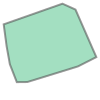

In [9]:
hull_poly = MultiPoint([(lon, lat) for lat, lon in seed]).convex_hull
display(hull_poly)

# only mark edge as required if all its points are within the convex hull
for u, v, data in G.edges(data=True):
    geom = data.get('geometry')
    if geom:
        # check all points in geometry
        if all(hull_poly.contains(Point(x, y)) for x, y in geom.coords):
            data['required'] = True  # edge is fully inside
        else:
            data['required'] = False  # some part is outside
    else:
        data['required'] = False  # no geometry, can't verify


In [10]:
# edges that are required
required_edges = [(u, v, k) for u, v, k, data in G.edges(keys=True, data=True) if data.get('required')]

display(required_edges)


[(74911988, 74914669, 0),
 (74911988, 74956262, 0),
 (74911988, 74950812, 0),
 (74912671, 74928910, 0),
 (74912671, 74918564, 0),
 (74914669, 74928762, 0),
 (74914669, 74911988, 0),
 (74914669, 74936675, 0),
 (74917238, 74957420, 0),
 (74917238, 74939309, 0),
 (74918564, 74912671, 0),
 (74921441, 74959656, 0),
 (74921441, 74928910, 0),
 (74923454, 7025646729, 0),
 (74923454, 74955326, 0),
 (74923454, 74961118, 0),
 (74927268, 74928762, 0),
 (74927268, 74937206, 0),
 (74927268, 74936675, 0),
 (74928387, 74950206, 0),
 (74928387, 74961118, 0),
 (74928387, 74931726, 0),
 (74928762, 74927268, 0),
 (74928762, 74944360, 0),
 (74928762, 74914669, 0),
 (74928762, 74930044, 0),
 (74928910, 74921441, 0),
 (74928910, 74912671, 0),
 (74928910, 74937964, 0),
 (74930044, 74928762, 0),
 (74931726, 74937354, 0),
 (74931726, 74928387, 0),
 (74931726, 74953102, 0),
 (74935858, 74959656, 0),
 (74935858, 74937791, 0),
 (74935858, 74936780, 0),
 (74936675, 74927268, 0),
 (74936675, 74957792, 0),
 (74936675

In [11]:
import matplotlib.pyplot as plt

In [12]:
# import matplotlib.pyplot as plt
# import networkx as nx

# # create a subgraph with only required edges
# required_edges = [(u, v, k) for u, v, k, data in G.edges(keys=True, data=True) if data.get('required')]

# required_G = G.edge_subgraph(required_edges).copy()

# # Prepare edge colors: red if required, gray otherwise
# edge_colors = []
# for u, v, k, data in G.edges(keys=True, data=True):
#     if data.get('required'):
#         edge_colors.append('red')
#     else:
#         edge_colors.append('gray')

# # Plot with custom edge colors, hide nodes (node_size=0)
# fig, ax = ox.plot_graph(
#     G,QA
#     edge_color=edge_colors,
#     node_size=0,
#     show=False,  # We'll call plt.show() after
#     close=False  # Keep plot open for more customization if needed
# )

# plt.show()



In [13]:
# finding_depot = [
#   [
#     "42.45010",
#     "-70.98104"
#   ],
#   [
#     "42.44949",
#     "-70.97904"
#   ],
#   [
#     "42.44639",
#     "-70.97941"
#   ],
#   [
#     "42.44686",
#     "-70.98258"
#   ],
#   [
#     "42.44851",
#     "-70.98248"
#   ]
# ]

# hull_poly = MultiPoint([(lon, lat) for lat, lon in finding_depot]).convex_hull
# display(hull_poly)

# # get nodes inside the convex hull
# required_nodes = []
# for node, data in G.nodes(data=True):
#     point = Point(data['x'], data['y'])  # x = lon, y = lat
#     if hull_poly.contains(point):
#         required_nodes.append(node)

# # optionally turn into a set
# required_node_set = set(required_nodes)

# # check how many
# required_node_set

In [14]:
# # assign node colors
# node_colors = ['red' if n in {74944114} else 'gray' for n in G.nodes]

# # assign node sizes (100 if depot, else 10)
# node_sizes = [100 if n in {74944114} else 0 for n in G.nodes]

# # plot the graph
# fig, ax = ox.plot_graph(
#     G,
#     node_color=node_colors,
#     node_size=node_sizes,
#     edge_color='lightgray',
#     show=False,
#     close=False
# )
# plt.show()


In [15]:
# # get list of required nodes (with their data if needed)
# required_nodes = [(n, data) for n, data in G.nodes(data=True) if n in required_node_set]

# display(required_nodes)


In [16]:
# [(74926095,
#   {'y': 42.4495507,
#    'x': -70.980652,
#    'highway': 'traffic_signals',
#    'street_count': 4}),
#  (74944114,
#   {'y': 42.4494673,
#    'x': -70.9805063,
#    'highway': 'traffic_signals',
#    'street_count': 3})]

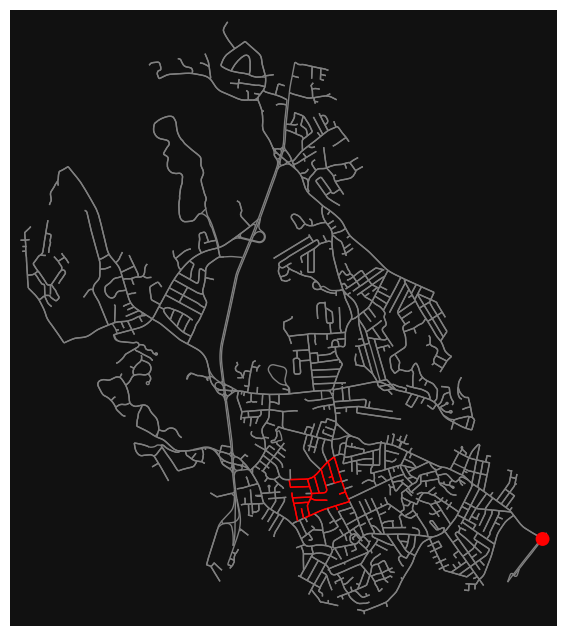

In [17]:
# mark the depot node ID
depot_node = 74944114

# build edge colors
edge_colors = ['red' if data.get('required') else 'gray' for _, _, _, data in G.edges(keys=True, data=True)]

# build node colors: red for depot, gray otherwise
node_colors = ['red' if n == depot_node else 'gray' for n in G.nodes]

# build node sizes: 100 for depot, 0 for others
node_sizes = [100 if n == depot_node else 0 for n in G.nodes]

# plot full graph with colored edges and highlighted depot node
fig, ax = ox.plot_graph(
    G,
    edge_color=edge_colors,
    node_color=node_colors,
    node_size=node_sizes,
    show=False,
    close=False
)

plt.show()

In [18]:
import networkx as nx

# Check number of nodes and edges
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

# Preview the nodes with their attributes
for n, data in list(G.nodes(data=True))[:5]:  # first 5 nodes
    print(f"Node {n}: {data}")

# Preview the edges with their attributes
for u, v, k, data in list(G.edges(keys=True, data=True))[:10]:  # first 10 edges
    print(f"Edge {u} -> {v} (key={k}): {data}")


Number of nodes: 1362
Number of edges: 3188
Node 73588159: {'y': 42.44374, 'x': -71.0132422, 'street_count': 3}
Node 74910413: {'y': 42.469531, 'x': -71.005453, 'street_count': 4}
Node 74910478: {'y': 42.457895, 'x': -71.0240196, 'street_count': 3}
Node 74910597: {'y': 42.495357, 'x': -71.020027, 'street_count': 3}
Node 74910645: {'y': 42.4808147, 'x': -71.0112052, 'highway': 'turning_circle', 'street_count': 1}
Edge 73588159 -> 74923778 (key=0): {'osmid': 9616163, 'highway': 'secondary', 'lanes': '2', 'name': 'Lincoln Avenue', 'width': '15.2', 'oneway': False, 'reversed': False, 'length': np.float64(64.26480671001988), 'geometry': <LINESTRING (-71.013 42.444, -71.013 42.444, -71.013 42.444)>, 'required': False}
Edge 74910413 -> 74937219 (key=0): {'osmid': 9617219, 'highway': 'residential', 'lanes': '2', 'name': 'Bridge Street', 'width': '11.0', 'oneway': False, 'reversed': False, 'length': np.float64(58.57662493433375), 'required': False}
Edge 74910413 -> 6275285121 (key=0): {'osmid':

In [19]:
import networkx as nx
from typing import Tuple, List, Dict
import numpy as np

# check if edge is zig-zag
def is_zigzag_edge(data):
    highway = data.get("highway")
    if isinstance(highway, list):
        highway = highway[0]

    width = data.get("width")
    if isinstance(width, list):
        try:
            width = float(width[0])
        except:
            width = None
    else:
        try:
            width = float(width)
        except:
            width = None

    return highway in {"residential", "service", "living_street", "unclassified"} or (
        width is not None and width < 3.5
    )

# estimate travel time
def estimate_travel_time(length: float, data: dict) -> int:
    maxspeed = data.get("maxspeed", None)
    if isinstance(maxspeed, list):
        maxspeed = maxspeed[0]
    try:
        speed_kmh = float(maxspeed)
    except:
        speed_kmh = 30.0  # fallback
    speed_mps = speed_kmh * 1000 / 3600
    return max(int(length / speed_mps), 1)

# estimate service time
def estimate_service_time(length: float, is_zigzag: bool, 
                          house_density: float = 0.05  # houses per meter 
                         ) -> int:
    base_time = length * house_density * 0.5 # 0.50 minutes or 30 seconds per house
    if is_zigzag:
        return np.round(3 * base_time, 0).astype(int)
    else:
        return np.round(base_time,0).astype(int)

# main conversion
def graph_to_windy_inputs(G: nx.MultiDiGraph, depot_node: int) -> Tuple:
    V = list(G.nodes)
    A = []
    R = []
    Z = []
    W = []
    t = {}
    s1 = {}
    s2 = {}
    T = {}

    for u, v, key, data in G.edges(keys=True, data=True):
        arc = (u, v)
        A.append(arc)
        length = data.get("length", 1.0)
        t[arc] = estimate_travel_time(length, data)

        is_required = data.get("required", False)
        is_zigzag = is_zigzag_edge(data)

        if is_required:
            R.append(arc)
            s1[arc] = estimate_service_time(length, is_zigzag=False)

        if is_zigzag:
            Z.append(arc)
            s2[arc] = estimate_service_time(length, is_zigzag=True)

    return V, A, R, Z, W, t, s1, s2, T, depot_node

In [20]:
V, A, R, Z, W, t, s1, s2, T, depot_node = graph_to_windy_inputs(G, depot_node)

In [21]:
t

{(73588159, 74923778): 7,
 (74910413, 74937219): 7,
 (74910413, 6275285121): 8,
 (74910413, 74963488): 41,
 (74910413, 74944984): 8,
 (74910478, 74934620): 9,
 (74910597, 74919844): 8,
 (74910597, 74926918): 6,
 (74910597, 74932606): 4,
 (74910645, 74927344): 9,
 (74910664, 74922439): 8,
 (74910693, 74953753): 13,
 (74910730, 74960521): 8,
 (74910730, 74926381): 13,
 (74910730, 74958830): 17,
 (74910864, 74915856): 8,
 (74910864, 74929745): 9,
 (74910864, 74927344): 7,
 (74910939, 74922538): 4,
 (74910950, 74930948): 19,
 (74910975, 74921782): 7,
 (74910975, 74929446): 7,
 (74910975, 74916255): 8,
 (74911107, 74929397): 4,
 (74911107, 74921675): 10,
 (74911114, 74917013): 10,
 (74911151, 74923879): 16,
 (74911151, 74961463): 12,
 (74911151, 74939158): 25,
 (74911266, 74913448): 11,
 (74911266, 74914338): 35,
 (74911266, 74946291): 21,
 (74911284, 74949630): 7,
 (74911284, 74919887): 8,
 (74911284, 74945152): 14,
 (74911284, 74933903): 14,
 (74911330, 74914289): 2,
 (74911330, 74919751)

In [22]:
s1

{(74911988, 74914669): np.int64(4),
 (74911988, 74956262): np.int64(1),
 (74911988, 74950812): np.int64(1),
 (74912671, 74928910): np.int64(1),
 (74912671, 74918564): np.int64(2),
 (74914669, 74928762): np.int64(2),
 (74914669, 74911988): np.int64(4),
 (74914669, 74936675): np.int64(4),
 (74917238, 74957420): np.int64(3),
 (74917238, 74939309): np.int64(2),
 (74918564, 74912671): np.int64(2),
 (74921441, 74959656): np.int64(1),
 (74921441, 74928910): np.int64(2),
 (74923454, 7025646729): np.int64(4),
 (74923454, 74955326): np.int64(2),
 (74923454, 74961118): np.int64(3),
 (74927268, 74928762): np.int64(5),
 (74927268, 74937206): np.int64(2),
 (74927268, 74936675): np.int64(2),
 (74928387, 74950206): np.int64(5),
 (74928387, 74961118): np.int64(3),
 (74928387, 74931726): np.int64(2),
 (74928762, 74927268): np.int64(5),
 (74928762, 74944360): np.int64(1),
 (74928762, 74914669): np.int64(2),
 (74928762, 74930044): np.int64(5),
 (74928910, 74921441): np.int64(2),
 (74928910, 74912671): np.

In [23]:
s2

{(74910413, 74937219): np.int64(4),
 (74910413, 6275285121): np.int64(5),
 (74910413, 74963488): np.int64(26),
 (74910413, 74944984): np.int64(5),
 (74910597, 74919844): np.int64(5),
 (74910645, 74927344): np.int64(6),
 (74910730, 74960521): np.int64(6),
 (74910730, 74926381): np.int64(8),
 (74910730, 74958830): np.int64(11),
 (74910864, 74927344): np.int64(5),
 (74910939, 74922538): np.int64(3),
 (74910950, 74930948): np.int64(12),
 (74910975, 74921782): np.int64(5),
 (74910975, 74929446): np.int64(5),
 (74910975, 74916255): np.int64(5),
 (74911114, 74917013): np.int64(7),
 (74911151, 74923879): np.int64(11),
 (74911151, 74961463): np.int64(8),
 (74911151, 74939158): np.int64(16),
 (74911266, 74913448): np.int64(7),
 (74911266, 74914338): np.int64(22),
 (74911266, 74946291): np.int64(14),
 (74911284, 74949630): np.int64(5),
 (74911284, 74919887): np.int64(5),
 (74911284, 74945152): np.int64(9),
 (74911284, 74933903): np.int64(9),
 (74911330, 74914289): np.int64(2),
 (74911330, 7491975

In [ ]:
from windy_postman_timewindows_zigzags import solve_windy_postman

solve_windy_postman(V, A, R, Z, s1, s2, depot_node, W, T, t)

INFO:windy_postman_timewindows_zigzags:Building graph and data...
INFO:windy_postman_timewindows_zigzags:Created digraph with artificial depot 73588158
INFO:windy_postman_timewindows_zigzags:Computing Shortest Paths...
INFO:windy_postman_timewindows_zigzags:Computed shortest paths between 39 required vertices.


### Notes

- 'Kernel Restarting -- The kernel for InstanceGenerating.ipynb appears to have died. It will restart automatically.'
- The kernel keeps failing, likely due to memory limitations. This is also with a much smaller problem than the full-scale version!

- Dies before ever getting to model solving! Hmm... SCIP is what was used, but ideally would use HiGHS or something similar (could look into HiGHS error messages)
- Dies in SCIP and HiGHS... hmmm